<a href="https://colab.research.google.com/github/tubleronchik/SPO/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas
import geopandas as gpd

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
%matplotlib inline
mo_gdf = gpd.read_file('admin_level_8_geojson (1).geojson')
#mo_gdf.head(200)
#mo_gdf[mo_gdf.name == 'округ Кронверкское'].plot()
#plt.show()
#mo_gdf[['name', 'geometry']][:10]

In [98]:
petroga = mo_gdf[(mo_gdf.name == 'округ Кронверкское') | (mo_gdf.name == 'Посадский округ') | (mo_gdf.name == 'округ Чкаловское') | \
       (mo_gdf.name == 'округ Аптекарский остров') | (mo_gdf.name == 'Петровский округ') | (mo_gdf.name == 'Введенский округ')]
petroga = petroga[['name', 'geometry']]
petroga

,name,geometry
2902,Посадский округ,"MULTIPOLYGON (((30.34541 59.95224, 30.33489 59..."
6128,округ Аптекарский остров,"MULTIPOLYGON (((30.33496 59.96712, 30.33303 59..."
11107,Введенский округ,"MULTIPOLYGON (((30.30842 59.95553, 30.30835 59..."
11346,округ Чкаловское,"MULTIPOLYGON (((30.30778 59.96976, 30.30749 59..."
11433,округ Кронверкское,"MULTIPOLYGON (((30.32760 59.94862, 30.32363 59..."
11434,Петровский округ,"MULTIPOLYGON (((30.30527 59.96159, 30.30515 59..."


In [0]:
#petroga.plot(column = 'name', linewidth=0.5, cmap='plasma', legend=True, figsize=[15,30])

АНАЛИЗ

In [0]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [9]:
url_district = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217436&type=222"
def parser(url):
  response = requests.get(url)
  page = BeautifulSoup(response.content, "lxml")
  UIK = pd.read_html(url, encoding='cp1251', header = 0)[7]
  UIK.drop([11], inplace = True) # чистим от мусора
  for i in range(UIK.shape[1]): #от 0 до размерности массива (берем столбцы)
    UIK.iloc[2,i] = int(UIK.iloc[2,i]) + int(UIK.iloc[3,i]) #подсчет явки
    for j in range(3):
      UIK.iloc[(11+j), i] = (UIK.iloc[(11+j), i]).split()[1] #убираем проценты
  UIK.drop([3], inplace = True)
  UIK
  return(UIK)
    
UIK = parser(url_district)  
UIK


,УИК №1612,УИК №1613,УИК №1614,УИК №1615,УИК №1616,УИК №1617,УИК №1618,УИК №1619,УИК №1620,УИК №1621,УИК №1622,УИК №1623,УИК №1624,УИК №1625,УИК №1626,УИК №1627,УИК №1628,УИК №1629,УИК №1630,УИК №1631,УИК №1632,УИК №1633,УИК №1634,УИК №1635,УИК №1636,УИК №1637,УИК №1638,УИК №1639,УИК №1640,УИК №1641,УИК №1642,УИК №1643,УИК №1644,УИК №1645,УИК №1646,УИК №1647,УИК №1648,УИК №1649,УИК №1650,УИК №1651,УИК №1652,УИК №1653,УИК №1654,УИК №1655,УИК №1656,УИК №1657,УИК №1658,УИК №1659,УИК №1660,УИК №1661,УИК №1662,УИК №1663,УИК №1664,УИК №1665,УИК №1667
0,1438,1196,1716,1771,1770,1462,1375,1899,2171,1853,2240,1318,1843,1755,977,1559,2187,1185,1403,2097,1926,1678,1139,1441,1733,2739,2198,1086,1694,1876,961,2171,1674,1372,1787,2535,1185,1393,1463,1679,1154,2539,2426,1518,2507,2474,2460,2449,2167,2166,2347,1046,1925,183,128
1,1000,900,1200,1200,1300,1100,1150,1200,1500,1300,1600,1000,1300,1300,700,1100,1600,900,1000,1500,1300,1200,700,1000,1350,1700,1500,850,1000,1300,850,1500,1200,1000,1300,1800,1000,1000,1100,1600,800,1700,1700,1250,1800,1800,1700,1600,1500,1500,1700,800,1300,183,126
2,783,501,568,630,962,694,1011,612,918,903,959,716,766,741,560,856,1116,402,719,701,982,661,607,559,1196,1001,1147,661,996,1199,716,1002,1133,356,1075,1739,800,924,848,923,298,1694,1464,1147,1512,1147,906,1247,1204,1177,1251,634,1030,183,126
4,217,399,632,570,338,406,139,588,582,397,641,284,534,559,140,244,484,498,281,799,318,539,93,441,154,699,353,189,4,101,134,498,67,644,225,61,200,76,252,677,502,6,236,103,288,653,794,353,296,323,449,166,270,0,0
5,7,2,12,25,53,7,6,9,59,31,9,0,39,43,8,15,5,2,3,0,3,2,3,6,5,23,6,4,7,4,1,10,12,3,5,22,5,1,6,8,11,55,84,3,9,14,50,238,78,45,12,4,60,61,119
6,701,499,509,599,878,673,1005,602,859,872,941,701,717,687,552,841,1111,336,642,620,974,648,601,536,1159,941,1141,646,989,1195,715,969,1121,353,1069,1717,795,806,842,913,287,1639,1380,1144,1503,1109,856,999,1121,1127,1239,622,970,122,7
7,22,16,14,19,11,3,25,22,28,19,22,3,12,33,8,20,8,23,13,13,20,19,5,8,19,30,22,9,16,27,7,26,23,35,17,27,8,19,66,27,8,27,2,48,3,71,22,24,0,44,30,13,15,4,1
8,686,485,507,605,920,677,986,589,890,884,928,698,744,697,552,836,1108,315,632,607,957,631,599,534,1145,934,1125,641,980,1172,709,953,1110,321,1057,1712,792,788,782,894,290,1667,1462,1099,1509,1052,884,1213,1199,1128,1221,613,1015,179,125
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
procent_appearence = []
for i in range(UIK.shape[1]):
  procent = int(UIK.iloc[2, i])/(int(UIK.iloc[0,i]))
  procent_appearence.append(procent*100)
procent_Amosov = []
procent_Beglov = []
procent_Tikhonova = []
appearence = []


for i in range(UIK.shape[1]):
  procent_Amosov.append(float(UIK.iloc[10, i].split("%")[0]))
  procent_Beglov.append(float(UIK.iloc[11, i].split("%")[0]))
  procent_Tikhonova.append(float(UIK.iloc[12, i].split("%")[0]))
  appearence.append(int(UIK.iloc[0,i]))

In [0]:
procent_appearence_okrug = []
app_vvedenskij = 0
app_kronva = 0
app_posad = 0
app_apt = 0
app_petr = 0
app_chkala = 0
for j in range(8):
  app_vvedenskij = app_vvedenskij + procent_appearence[j] # Явка в Введнском округе
for i in range(8,15):
  app_kronva = app_kronva + procent_appearence[i] # Явка в Кронверкском округе
for i in range(15,23):
  app_posad = app_posad + procent_appearence[i]
for i in range(23,32):
  app_apt = app_apt + procent_appearence[i]
for i in range(32,42):
  app_petr = app_petr + procent_appearence[i]
for i in range(42,53):
  app_chkala = app_chkala + procent_appearence[i]
procent_appearence_okrug.append(int(app_posad / 8))
procent_appearence_okrug.append(int(app_apt / 9))
procent_appearence_okrug.append(int(app_vvedenskij / 8))
procent_appearence_okrug.append(int(app_chkala / 11))
procent_appearence_okrug.append(int(app_kronva / 7))
procent_appearence_okrug.append(int(app_petr / 10))
print(procent_appearence_okrug)






In [100]:
ind = ['2902', '6128', '11107', '11346', '11433', '11434']
petroga2 = pd.DataFrame(data={'явка %' : procent_appearence_okrug}, index=ind)
petroga = pd.merge(petroga, petroga2, on=petroga.index, how='outer')
petroga

,key_0,name,geometry,явка %
0,2902,Посадский округ,"MULTIPOLYGON (((30.34541 59.95224, 30.33489 59...",46
1,6128,округ Аптекарский остров,"MULTIPOLYGON (((30.33496 59.96712, 30.33303 59...",55
2,11107,Введенский округ,"MULTIPOLYGON (((30.30842 59.95553, 30.30835 59...",46
3,11346,округ Чкаловское,"MULTIPOLYGON (((30.30778 59.96976, 30.30749 59...",55
4,11433,округ Кронверкское,"MULTIPOLYGON (((30.32760 59.94862, 30.32363 59...",47
5,11434,Петровский округ,"MULTIPOLYGON (((30.30527 59.96159, 30.30515 59...",56


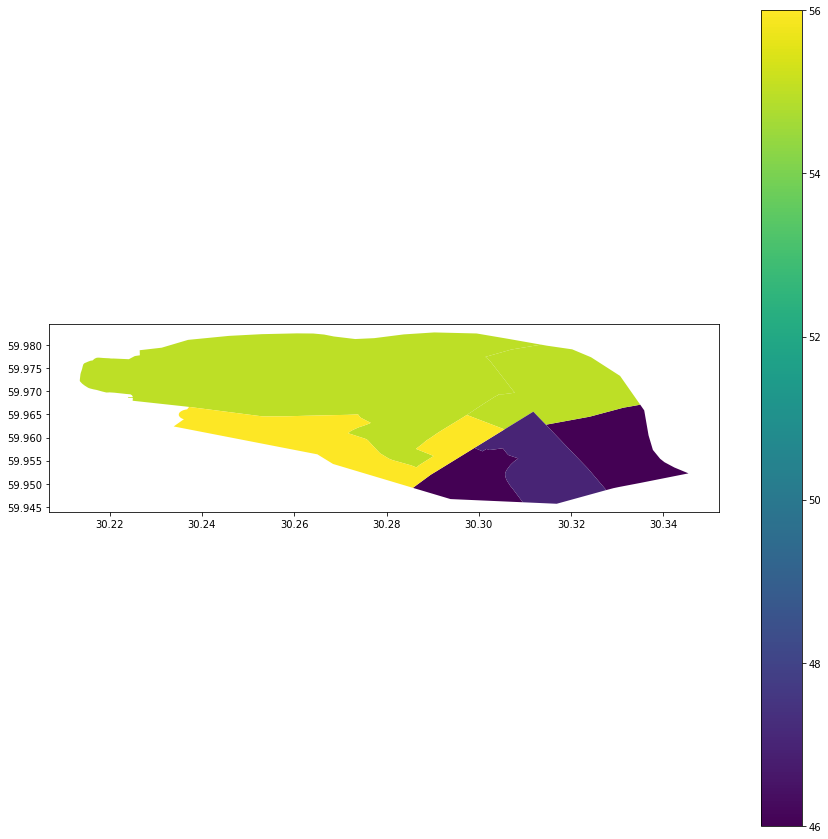

In [110]:
full_petroga = gpd.GeoDataFrame(petroga)
#full_petroga
full_petroga.plot(column = 'явка %', linewidth=0.5, cmap='viridis', legend=True, figsize=[15,15])

In [0]:
import folium

In [0]:
response = open('УИК.kml')
html = response.read()
names = []
longitude = [] # долгота уик-ов
latitude = [] # широта всех уик-ов

soup = BeautifulSoup(html, "lxml")
# парсер номеров уик-ов
name = soup.find_all('name')
for i in name:
  names.append(i.text)
del names[0]
# парсер координат уик-ов
cord = soup.find_all('coordinates')
for j in cord:
  longitude.append(float(((j.text).split(",")[0]).strip()))
  latitude.append(float((j.text).split(",")[1]))
  
my_longitude = [] # долгота моих уик-ов
my_latitude = [] # широта моих уик-ов
for i in range(1879):
  if float(names[i]) > 1611 and float(names[i]) < 1665:
    my_longitude.append(longitude[i])
    my_latitude.append(latitude[i])
my_longitude.append(30.2693)
my_latitude.append(59.9676)

In [182]:
map_petroga2 = folium.Map(location=[59.9677274, 30.2921836], zoom_start = 13)
map_petroga2.choropleth(
    geo_data=full_petroga[['name', 'geometry']].to_json(),
    name='choropleth',
    data=full_petroga[['name', 'явка %']],
    key_on='feature.properties.name',
    columns=['name', 'явка %'],
    fill_color='PuBuGn',
    line_weight=1,
    fill_opacity=0.8,
    line_opacity=2,
    legend_name='type',
    highlight = True
)
i = 0
for lat, lon in zip(my_latitude,my_longitude):
  folium.Marker(location=[lat, lon], popup=str(int(procent_appearence[i]))+"%", icon=folium.Icon(color = 'darkpurple', icon='plane')).add_to(map_petroga2)
  i = i + 1 

map_petroga2


/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [0]:
map_petroga2.save('map_petroga3.html')


ПЫТАЛАСЬ

In [0]:
import pandas as pd
#mo_gdf[mo_gdf.name == 'округ Кронверкское']
#mo_gdf[mo_gdf.name == 'Посадский округ']
#mo_gdf[mo_gdf.name == 'округ Чкаловское']
#mo_gdf[mo_gdf.name == 'округ Аптекарский остров']
#mo_gdf[mo_gdf.name == 'Петровский округ']
#mo_gdf[mo_gdf.name == 'Введенский округ']
table = pd.DataFrame({
    'округ 1': mo_gdf[mo_gdf.name == 'округ Кронверкское']
   # 'округ 2': mo_gdf[mo_gdf.name == 'Посадский округ']
})
table